In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [5]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [5]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [14]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [16]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
predictions[0:5]

array([104.51164901, 158.42814434, 167.48757323, 160.10361555,
       203.32224444])

Text(0, 0.5, 'Predictions')

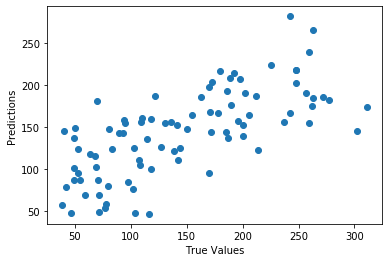

In [11]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [24]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 52.55849499311389
Train RMSE: 53.8968340273753


# Cross Validation

In [30]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [58]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [31]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
X_train, X_test,y_train, y_test

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


(array([[1, 2],
        [3, 4]]),
 array([[1, 2],
        [3, 4]]),
 array([1, 2]),
 array([3, 4]))

### LOOCV

In [62]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [19]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


In [18]:
?cross_val_score

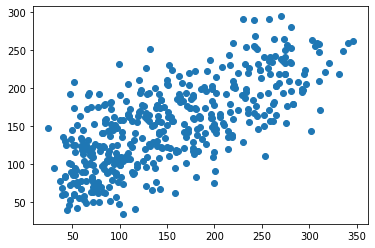

In [71]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [74]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# tasks 

##### Find out cross validation results without using cross_val_predict

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2) 


list_split=[]


for train_index, test_index in kf.split(df):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    list_split.append([train_index,test_index])
 


In [19]:
list_pred=[]

for i in range(len(list_split)):
  
    reg = linear_model.LinearRegression()
    model = reg.fit(df.iloc[list_split[i][0]], y[list_split[i][0]])
    predictions = reg.predict(df.iloc[list_split[i][1]])
    
    list_pred.extend(predictions)


list_pred

#predictions = cross_val_predict(model, df, y, cv=2)
#len(predictions)


[213.8640263198424,
 68.49403714689267,
 184.3946548171579,
 161.77299373115096,
 132.51258831658305,
 102.05953283572427,
 78.45679918802593,
 139.21396373134473,
 165.0962376786163,
 206.71181460736705,
 90.19629603944483,
 106.9408936915196,
 115.8910692676813,
 168.8138002077062,
 106.62303829479893,
 192.19877415624904,
 208.2813655811524,
 197.70876248608778,
 143.10065585585718,
 122.701187587314,
 109.82391686748473,
 88.33519262880185,
 112.50607171979593,
 244.1676676120771,
 163.6423226777639,
 149.8121254773567,
 82.82331557103015,
 170.14923859546954,
 127.3301991289958,
 183.44347919031773,
 156.98257450210582,
 61.13337426395927,
 263.73421587200517,
 100.53296525602534,
 75.00539872467704,
 85.6221016697366,
 210.16310211341533,
 149.58417472479078,
 254.5430543480922,
 138.18686088890198,
 158.41494600221924,
 55.98487994379745,
 147.98864405186328,
 66.03677478007268,
 228.31503817541335,
 136.1485002458837,
 140.7840092056236,
 102.07809257733237,
 83.53625818175838,

##### Implement cross validation without using sklearn at all

In [172]:
#y=a+bx
#b=Sum((x-xmean)*(y-ymean))/Sum((x-xmin)^2)
#a=ymean-b*xmean
x_mean=df.age.mean()
y_mean=y.mean()

Sxy=0
Sxx=0

for i in range(len(y)):
    Sxy += (df.age[i] - x_mean) * (y[i] - y_mean)
    Sxx += (df.age[i] - x_mean) ** 2
    

slope=Sxy/Sxx
intercept =y_mean-slope*x_mean

slope, intercept



(304.1830745282949, 152.13348416289605)

In [160]:
lm = linear_model.LinearRegression()
model = lm.fit(df[['age']], y)

model.coef_, model.intercept_


(array([304.18307453]), 152.13348416289605)

In [14]:
#y=a+b1xX1+b2xX2

df2=df[['age', 'sex']]

x1_mean=df2['age'].mean()
x2_mean=df2['sex'].mean()
y_mean=y.mean()

Sx1x1=0
Sx2x2=0
Sx1y=0
Sx2y=0
Sx1x2=0

for i in range(len(df2.age)):
    Sx1x1 +=(df2.age[i] - x1_mean) ** 2
    Sx2x2 +=(df2.sex[i] - x2_mean) ** 2
    Sx1y += (df.age[i] - x1_mean) * (y[i] - y_mean)
    Sx2y += (df.sex[i] - x2_mean) * (y[i] - y_mean)
    Sx1x2 +=(df.age[i] - x1_mean)*(df.sex[i] - x2_mean)

b1=(Sx2x2*Sx1y-Sx1x2*Sx2y)/(Sx1x1*Sx2x2-Sx1x2*Sx1x2) 
b2=(Sx1x1*Sx2y-Sx1x2*Sx1y)/(Sx1x1*Sx2x2-Sx1x2*Sx1x2) 

a=y_mean-b1*x1_mean-b2*x2_mean

b1, b2, a



(301.16135996453215, 17.39245419636587, 152.13348416289605)

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(df[['age','sex']], y)

model.coef_, model.intercept_

(array([301.16135996,  17.3924542 ]), 152.13348416289605)

# Feature Scaling

In [115]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 
y = data['Value']

In [108]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [144]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [145]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.172414,0.208333,0.404255,0.397959
1,0.344828,0.604167,0.595745,0.214286
2,0.310345,0.437500,0.468085,0.336735
3,0.172414,0.416667,0.553191,0.204082
4,0.172414,0.125000,0.319149,0.336735
...,...,...,...,...
14320,0.482759,0.458333,0.425532,0.071429
14321,0.310345,0.729167,0.787234,0.153061
14322,0.034483,0.458333,0.829787,0.163265
14323,0.724138,0.312500,0.276596,0.224490


In [146]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.379310,0.333333,0.297872,0.030612
1,0.379310,0.604167,0.574468,0.091837
2,0.586207,0.541667,0.510638,0.030612
3,0.310345,0.270833,0.297872,0.081633
4,0.413793,0.458333,0.425532,0.142857
...,...,...,...,...
3577,0.310345,0.500000,0.531915,0.061224
3578,0.241379,0.520833,0.659574,0.224490
3579,0.344828,0.437500,0.404255,0.163265
3580,0.344828,0.333333,0.361702,0.040816


### Standard Scaler

In [80]:
from sklearn.preprocessing import StandardScaler

In [148]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [149]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-0.877500,-1.472485,-0.704010,1.261695
1,0.196691,1.265282,0.759980,0.146003
2,-0.018147,0.112538,-0.216013,0.889797
3,-0.877500,-0.031555,0.434649,0.084020
4,-0.877500,-2.048857,-1.354672,0.889797
...,...,...,...,...
14320,1.056045,0.256631,-0.541344,-0.721758
14321,-0.018147,2.129840,2.223971,-0.225895
14322,-1.736854,0.256631,2.549302,-0.163912
14323,2.559913,-0.752020,-1.680003,0.207986


In [150]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.411530,-0.607927,-1.517338,-0.969689
1,0.411530,1.265282,0.597315,-0.597792
2,1.700560,0.833003,0.109318,-0.969689
3,-0.018147,-1.040206,-1.517338,-0.659775
4,0.626368,0.256631,-0.541344,-0.287878
...,...,...,...,...
3577,-0.018147,0.544817,0.271984,-0.783741
3578,-0.447824,0.688910,1.247977,0.207986
3579,0.196691,0.112538,-0.704010,-0.163912
3580,0.196691,-0.607927,-1.029341,-0.907706


# tasks

###### try applying this scalers to any dataset and check the regression results

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
arrx=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
arry=np.array([1,2,3,4,5,6,7,8,1,2])

X_train, X_test, Y_train, Y_test = train_test_split(arrx, arry, test_size=0.2)
lm = linear_model.LinearRegression()

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)

print(Y_test)
print (predictions)
print(mae)
print(mse)
print(rmse)
print(rse)


norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
Y_train = norm.transform(Y_train.reshape(-1,1))
X_test = norm.transform(X_test)
Y_test = norm.transform(Y_test.reshape(-1,1))

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)


print('minmax')
print(Y_test)
print (predictions)
print(mae)
print(mse)
print(rmse)
print(rse)

norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
Y_train = norm.transform(Y_train.reshape(-1,1))
X_test = norm.transform(X_test)
Y_test = norm.transform(Y_test.reshape(-1,1))

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)


print('std')
print(Y_test)
print (predictions)
print(mae)
print(mse)
print(rmse)
print(rse)


[2 7]
[5.78378378 4.62162162]
3.081081081081081
9.986851716581448
3.1601980502148037
-0.5978962746530316
minmax
[[0.125]
 [0.75 ]]
[[0.59797297]
 [0.4527027 ]]
0.38513513513513514
0.15604455807158513
0.39502475627685046
-0.5978962746530316
std
[[-1.0440738]
 [ 0.8542422]]
[[ 0.39248966]
 [-0.04874055]]
1.1697730974679448
1.4395461933811096
1.1998108990091354
-0.597896274653031


# One Hot Encoding

In [103]:
data = pd.read_csv('regression.csv')

In [99]:
data1=pd.get_dummies(data[['Age', 'Club']])

# tasks

###### try applying this scalers to any column(s) and check the regression results

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(data1[['Club_ SSV Jahn Regensburg']], data['Value'], test_size=0.2)
lm = linear_model.LinearRegression()

model = lm.fit(X_train, Y_train)

predictions = lm.predict(X_test)



mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)

print(mae)
print(mse)
print(rmse)
print(rse)


norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
Y_train = norm.transform(Y_train.values.reshape(-1,1))
X_test = norm.transform(X_test)
Y_test = norm.transform(Y_test.values.reshape(-1,1))

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)


print('minmax')
print(mae)
print(mse)
print(rmse)
print(rse)

norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
Y_train = norm.transform(Y_train.reshape(-1,1))
X_test = norm.transform(X_test)
Y_test = norm.transform(Y_test.reshape(-1,1))

model = lm.fit(X_train, Y_train)


predictions = lm.predict(X_test)

mae=mean_absolute_error(Y_test, predictions)
mse=mean_squared_error(Y_test, predictions)
rmse=np.sqrt(mean_squared_error(Y_test, predictions))
rse=r2_score(Y_test, predictions)


print('std')
print(mae)
print(mse)
print(rmse)
print(rse)


2836383.6821398283
33591173181408.445
5795789.263026085
4.81971151603533e-05
minmax
2836383.6821398283
33591173181408.445
5795789.263026085
4.81971151603533e-05
std
69353883.50933965
2.0083379038686572e+16
141715839.0536731
4.8197115160242276e-05
